# Preprocessing Data

Stroke dataset
 Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [201]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/RibbyLiliyana4/Tugas-Data-Mining/refs/heads/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Inconsistency Data

In [203]:
df.duplicated(subset=['id']).sum()

np.int64(0)

In [204]:
df = df.drop(['id'], axis=1)

In [233]:
df['stroke'] = df['stroke'].astype('category')
df['gender'] = df['gender'].astype('category')

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   object  
 5   work_type          5110 non-null   object  
 6   Residence_type     5110 non-null   object  
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   object  
 10  stroke             5110 non-null   category
dtypes: category(2), float64(3), int64(2), object(4)
memory usage: 369.7+ KB


In [207]:
missing_values = df.isnull().mean() * 100
print(missing_values)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


#Handling Missing Value

In [249]:
new_df = df.dropna(subset=['bmi'])
print(df.shape, new_df.shape)

(5110, 11) (4909, 11)


In [245]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4909 non-null   category
 1   age                4909 non-null   float64 
 2   hypertension       4909 non-null   int64   
 3   heart_disease      4909 non-null   int64   
 4   ever_married       4909 non-null   object  
 5   work_type          4909 non-null   object  
 6   Residence_type     4909 non-null   object  
 7   avg_glucose_level  4909 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     4909 non-null   object  
 10  stroke             4909 non-null   category
dtypes: category(2), float64(3), int64(2), object(4)
memory usage: 393.4+ KB


In [242]:
new_df['age'] = new_df['age'].fillna(new_df['age'].median())

/tmp/ipython-input-2193360230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age'] = new_df['age'].fillna(new_df['age'].median())


<Axes: >

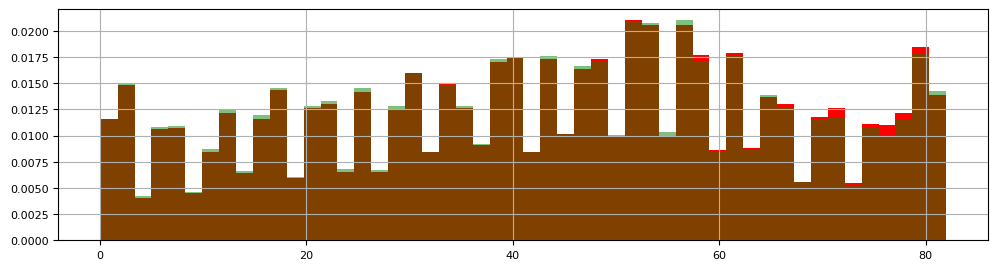

In [246]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['age'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['age'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

In [250]:
# new_df.fillna(new_df.median()).head(10)
new_df['age'] = new_df['age'].fillna(new_df['age'].mean())

/tmp/ipython-input-3731340978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age'] = new_df['age'].fillna(new_df['age'].mean())


<Axes: >

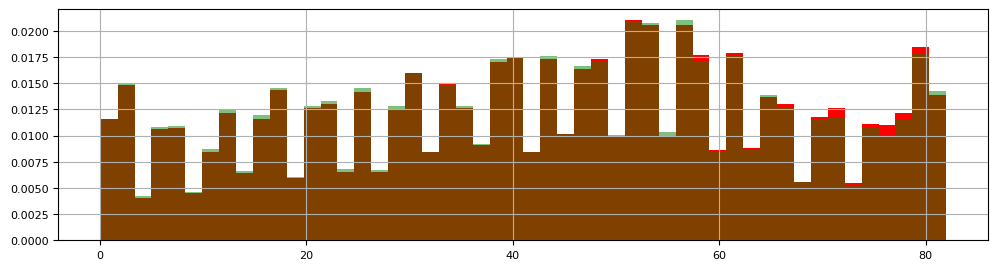

In [304]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(111)

# data asli
df['age'].hist(bins=50, ax=ax, density=True, color='red')

new_df['age'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

In [252]:
# imputasi dengan nilai median berdasarkan 'stroke'
new_df['age'] = new_df.groupby('stroke', observed=False)['age'].transform(lambda x: x.fillna(x.median()))

/tmp/ipython-input-3666551982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age'] = new_df.groupby('stroke', observed=False)['age'].transform(lambda x: x.fillna(x.median()))


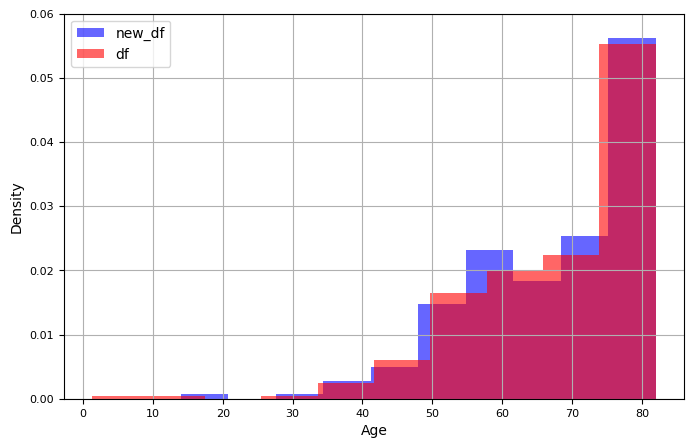

In [253]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

new_df[new_df['stroke'] == 1]['age'].hist(ax=ax, color='blue', density=True, alpha=0.6, label='new_df')

df[df['stroke'] == 1]['age'].hist(ax=ax, color='red', density=True, alpha=0.6, label='df')

plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.ylim(0, 0.06)
plt.show()

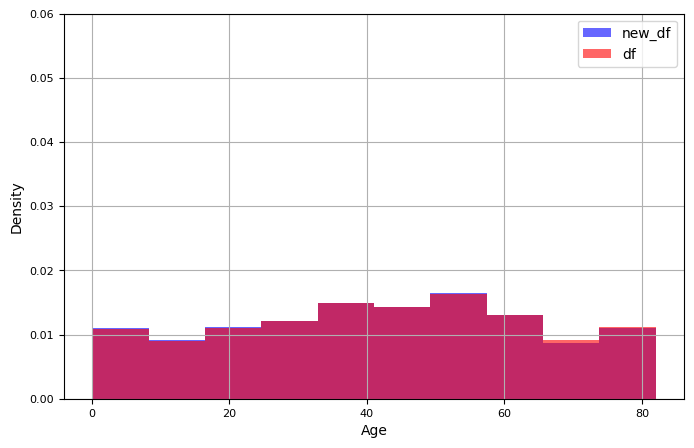

In [254]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

new_df[new_df['stroke'] == 0]['age'].hist( ax=ax, color='blue', density=True, alpha=0.6, label='new_df')

df[df['stroke'] == 0]['age'].hist(ax=ax, color='red', density=True, alpha=0.6, label='df')

plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.ylim(0, 0.06)
plt.show()

In [217]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4909 non-null   category
 1   age                4909 non-null   float64 
 2   hypertension       4909 non-null   int64   
 3   heart_disease      4909 non-null   int64   
 4   ever_married       4909 non-null   object  
 5   work_type          4909 non-null   object  
 6   Residence_type     4909 non-null   object  
 7   avg_glucose_level  4909 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     4909 non-null   object  
 10  stroke             4909 non-null   category
dtypes: category(2), float64(3), int64(2), object(4)
memory usage: 393.4+ KB


In [255]:
# Mengisi nilai NaN dengan nilai berikutnya (ke bawah) yang valid dalam kolom yang sama
df.fillna(method="bfill").head(10)

/tmp/ipython-input-1178531396.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill").head(10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.5,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,24.2,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [219]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Pilih fitur numerik yang tersedia di DataFrame saat ini untuk imputasi
# Kolom 'bmi' memiliki nilai yang hilang di df asli dan dapat diimputasi.
cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = df[cols]
impute_it = IterativeImputer()
X_imputed = impute_it.fit_transform(X)

# simpan hasilnya kembali ke dataframe baru
df_imputed = df.copy()
df_imputed[cols] = X_imputed  # Update imputasi kolom
print(df_imputed.head(10))

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0           0.0            1.0          Yes        Private   
1  Female  61.0           0.0            0.0          Yes  Self-employed   
2    Male  80.0           0.0            1.0          Yes        Private   
3  Female  49.0           0.0            0.0          Yes        Private   
4  Female  79.0           1.0            0.0          Yes  Self-employed   
5    Male  81.0           0.0            0.0          Yes        Private   
6    Male  74.0           1.0            1.0          Yes        Private   
7  Female  69.0           0.0            0.0           No        Private   
8  Female  59.0           0.0            0.0          Yes        Private   
9  Female  78.0           0.0            0.0          Yes        Private   

  Residence_type  avg_glucose_level        bmi   smoking_status stroke  
0          Urban             228.69  36.600000  formerly smoked      1  
1          Rural 

In [220]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   float64 
 3   heart_disease      5110 non-null   float64 
 4   ever_married       5110 non-null   object  
 5   work_type          5110 non-null   object  
 6   Residence_type     5110 non-null   object  
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   object  
 10  stroke             5110 non-null   category
dtypes: category(2), float64(5), object(4)
memory usage: 369.7+ KB


<Axes: >

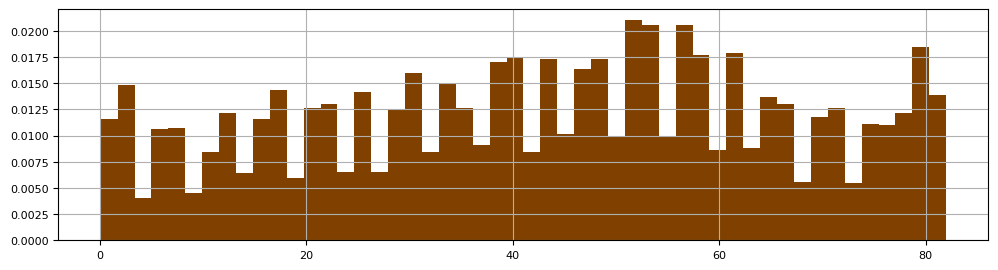

In [221]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(111)

df['age'].hist(bins=50, ax=ax, density=True, color='red')
df_imputed['age'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

In [257]:
from sklearn.impute import KNNImputer

# Pilih fitur yang digunakan untuk imputasi
cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = df[cols]
impute_it = KNNImputer(n_neighbors= 10)
X_imputed = impute_it.fit_transform(X)

# Simpan hasilnya kembali ke DataFrame baru
df_imputed_knn = df.copy()
df_imputed_knn[cols] = X_imputed  # Update kolom imputasi

# Cek hasil imputasi
print(df_imputed_knn.head(10))
print(df_imputed_knn.info())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0           0.0            1.0          Yes        Private   
1  Female  61.0           0.0            0.0          Yes  Self-employed   
2    Male  80.0           0.0            1.0          Yes        Private   
3  Female  49.0           0.0            0.0          Yes        Private   
4  Female  79.0           1.0            0.0          Yes  Self-employed   
5    Male  81.0           0.0            0.0          Yes        Private   
6    Male  74.0           1.0            1.0          Yes        Private   
7  Female  69.0           0.0            0.0           No        Private   
8  Female  59.0           0.0            0.0          Yes        Private   
9  Female  78.0           0.0            0.0          Yes        Private   

  Residence_type  avg_glucose_level    bmi   smoking_status stroke  
0          Urban             228.69  36.60  formerly smoked      1  
1          Rural         

<Axes: >

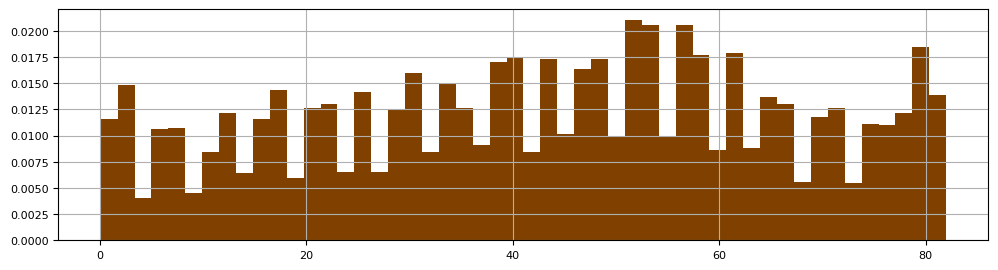

In [258]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(111)

df['age'].hist(bins=50, ax=ax, density=True, color='red')
df_imputed['age'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

In [224]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4909 non-null   category
 1   age                4909 non-null   float64 
 2   hypertension       4909 non-null   int64   
 3   heart_disease      4909 non-null   int64   
 4   ever_married       4909 non-null   object  
 5   work_type          4909 non-null   object  
 6   Residence_type     4909 non-null   object  
 7   avg_glucose_level  4909 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     4909 non-null   object  
 10  stroke             4909 non-null   category
dtypes: category(2), float64(3), int64(2), object(4)
memory usage: 393.4+ KB


# Handling Outliers

In [259]:
new_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237
std,22.555115,0.288875,0.216934,44.424341,7.854067
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.070000,23.500000
50%,44.000000,0.000000,0.000000,91.680000,28.100000
75%,60.000000,0.000000,0.000000,113.570000,33.100000
max,82.000000,1.000000,1.000000,271.740000,97.600000


In [260]:
new_df.describe(include='object')

,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909
unique,2,5,2,4
top,Yes,Private,Urban,never smoked
freq,3204,2811,2490,1852


In [261]:
print(new_df['stroke'].value_counts())
print(new_df['gender'].value_counts())
print(new_df['Residence_type'].value_counts())

stroke
0    4700
1     209
Name: count, dtype: int64
gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64
Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64


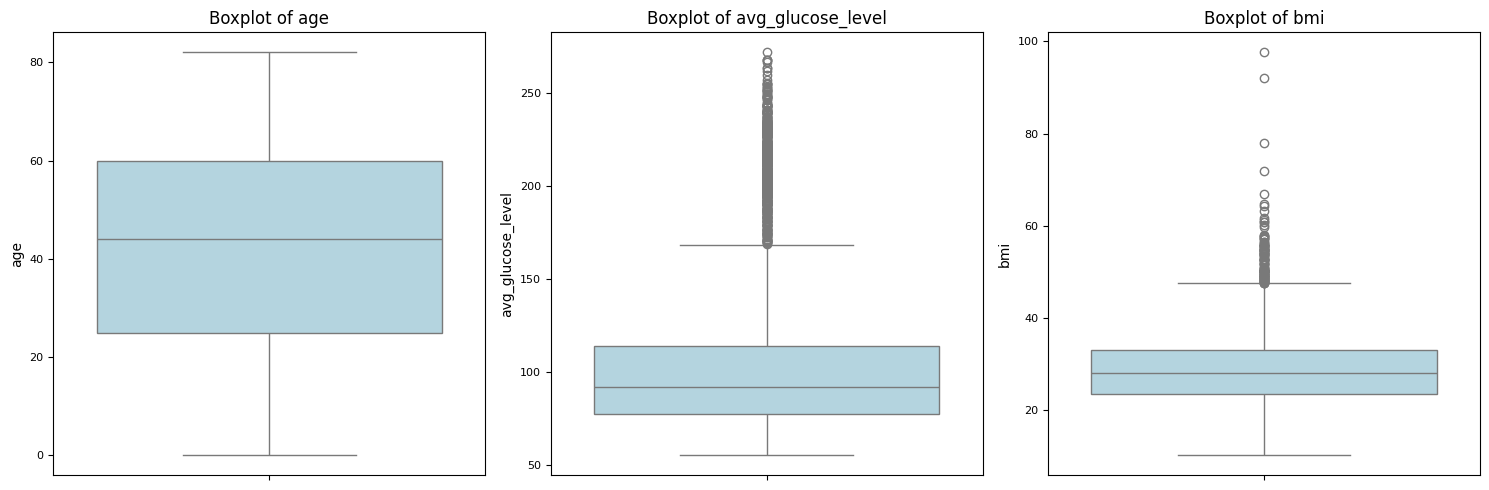

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt
var_num = ['age', 'avg_glucose_level', 'bmi']
var_cat = ['Survived', 'Sex', 'Pclass', 'Embarked']

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

plt.figure(figsize=(15, 5)) # Adjusted figure size for better visualization
for i in range(0, len(var_num)):
    plt.subplot(1, len(var_num), i+1)
    sns.boxplot(y=new_df[var_num[i]], color='lightblue', orient='v')
    plt.title(f'Boxplot of {var_num[i]}') # Add title for clarity
    plt.ylabel(var_num[i]) # Add y-label for clarity
    plt.tight_layout()
plt.show()

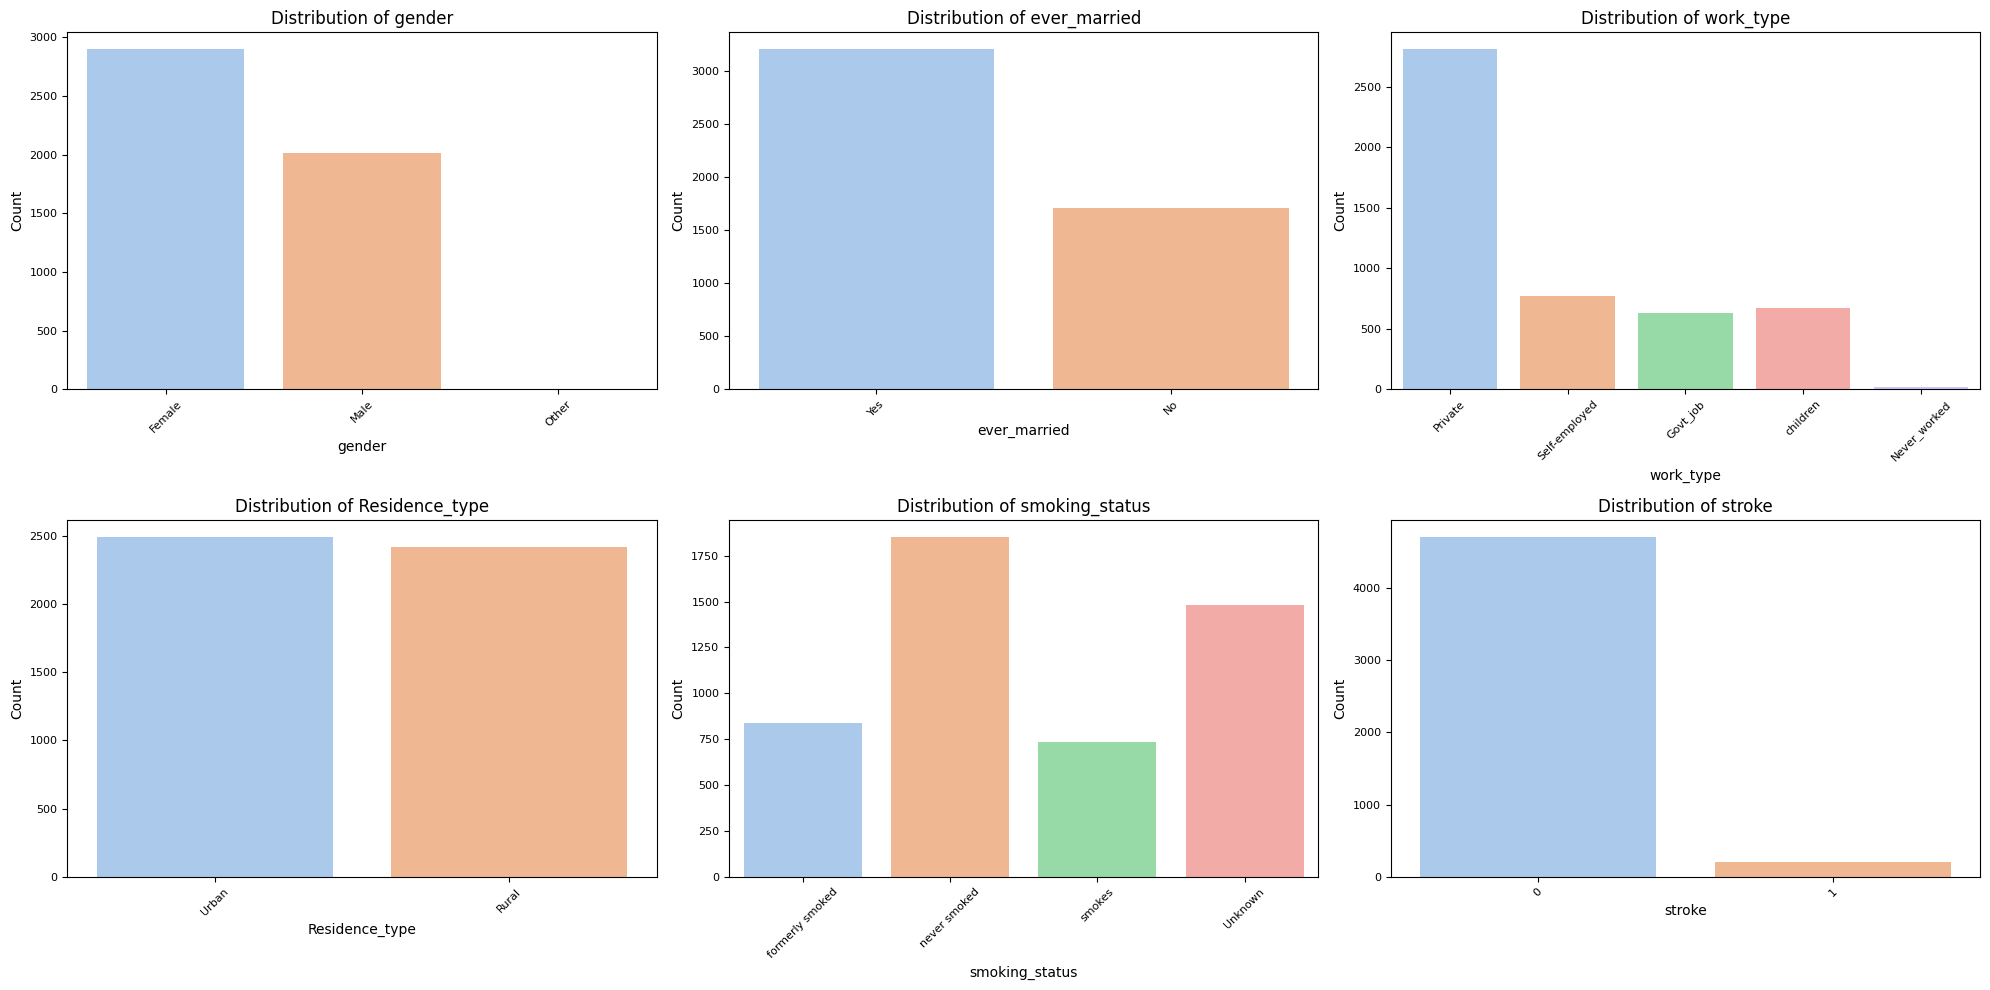

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

var_cat = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

fig, axes = plt.subplots(2, 3, figsize=(20, 10)) # Using 2 rows, 3 columns for better layout
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

for i, col in enumerate(var_cat):
    sns.countplot(data=new_df, x=col, hue=col, palette="pastel", legend=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()

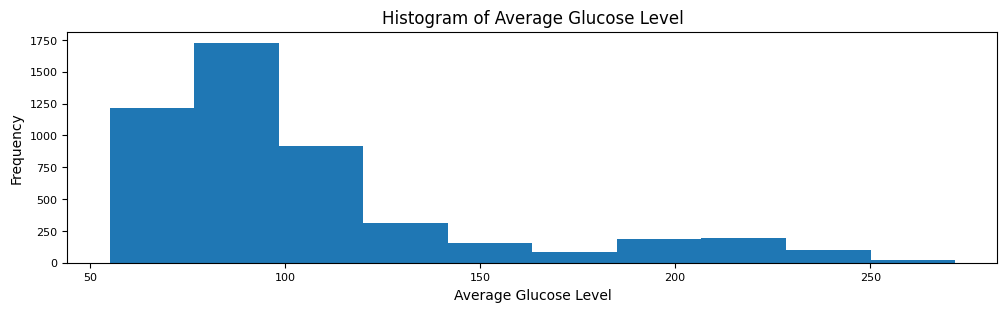

In [230]:
import matplotlib.pyplot as plt
import numpy as np

x = new_df['avg_glucose_level']

plt.hist(x)
plt.title('Histogram of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

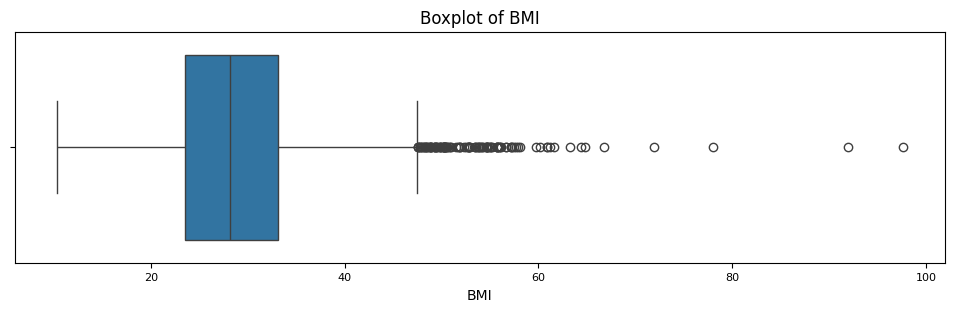

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = 'bmi', data = new_df)
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

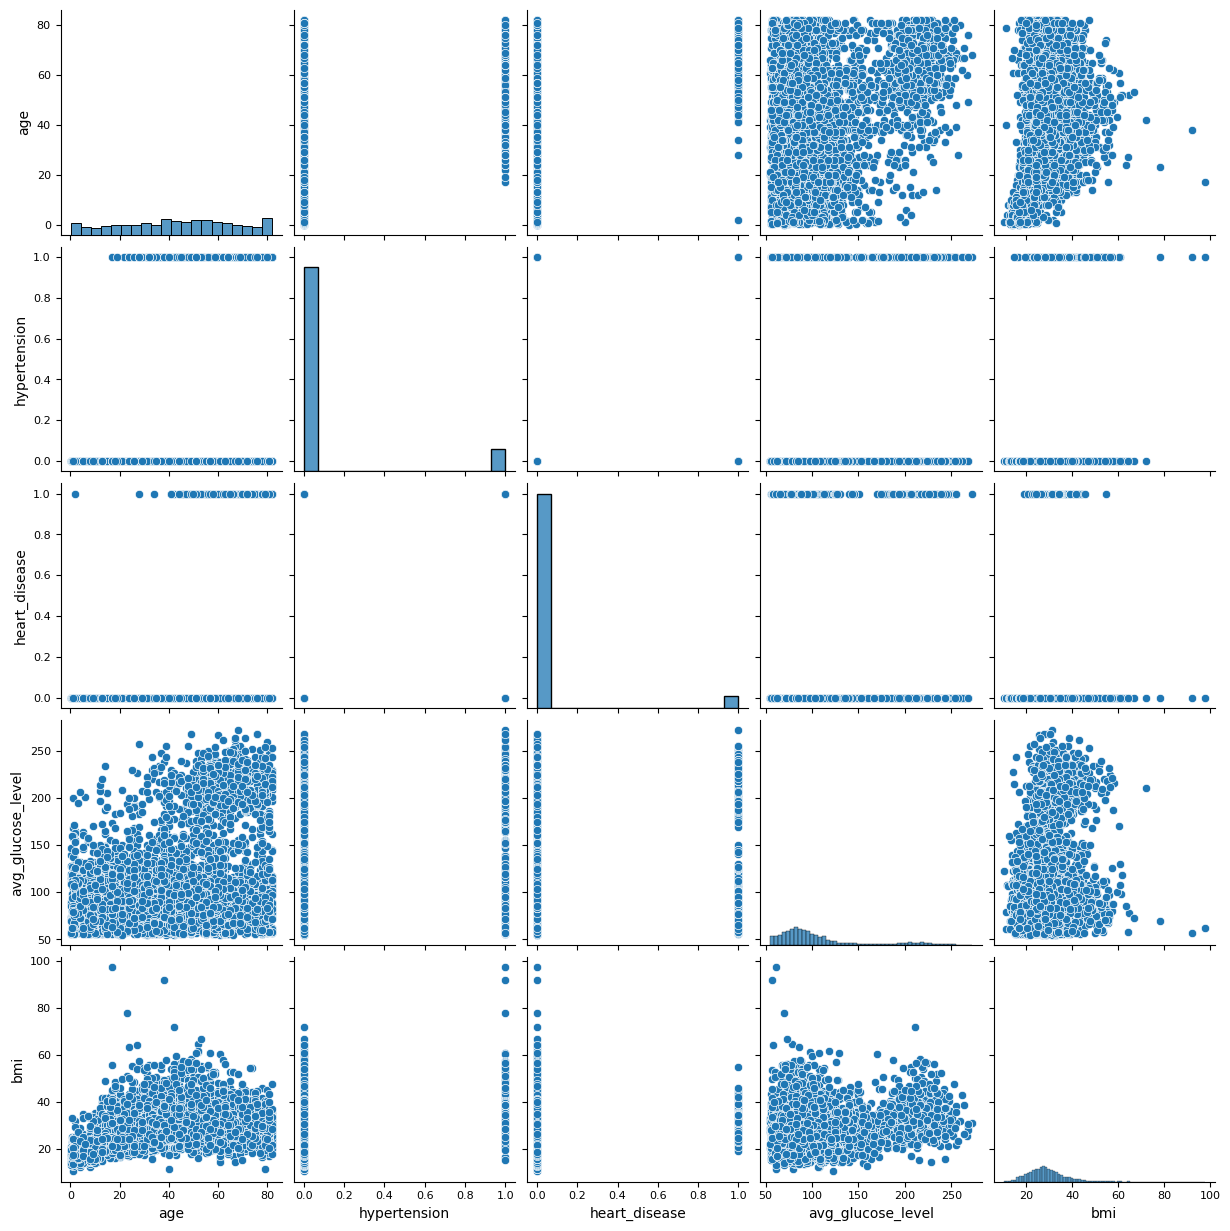

In [265]:
sns.pairplot(df)

In [268]:
from matplotlib.cbook import boxplot_stats
boxplot_stats(new_df['bmi'])

[{'mean': np.float64(28.893236911794663),
  'iqr': np.float64(9.600000000000001),
  'cilo': np.float64(27.884883179917658),
  'cihi': np.float64(28.315116820082345),
  'whishi': np.float64(47.5),
  'whislo': np.float64(10.3),
  'fliers': array([48.9, 56.6, 50.1, 54.6, 60.9, 54.7, 48.2, 64.8, 54.7, 49.8, 60.2,
         51. , 51.5, 71.9, 50.2, 47.8, 54.6, 55.7, 55.7, 57.5, 54.2, 52.3,
         50.3, 78. , 50.2, 53.4, 55.2, 48.4, 50.6, 49.5, 55. , 54.8, 50.2,
         52.8, 66.8, 55.1, 48.5, 55.9, 57.3, 49.8, 56. , 51.8, 57.7, 48.9,
         49.3, 49.8, 54. , 56.1, 97.6, 53.9, 49.4, 48.5, 49.2, 48.7, 48.9,
         53.8, 48.8, 52.7, 52.8, 55.7, 53.5, 50.5, 51.9, 63.3, 52.8, 61.2,
         48. , 50.1, 48.3, 58.1, 49.3, 50.4, 52.7, 48.3, 49.3, 51.9, 53.4,
         50.3, 59.7, 52.5, 52.9, 54.7, 61.6, 49.9, 53.8, 54.3, 47.9, 55. ,
         50.9, 50.6, 57.2, 64.4, 92. , 50.8, 55.9, 57.9, 47.6, 55.7, 48.8,
         57.2, 50.2, 48.1, 51.7, 60.9, 47.8, 47.6, 54.1, 56.6, 49.5, 47.6]),
  'q1': np.f

In [270]:
filter = (new_df['bmi'] > 47.5) | (new_df['bmi'] < 10.3)
new_df_filtered = new_df.loc[~filter].copy()

In [271]:
new_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4799 non-null   category
 1   age                4799 non-null   float64 
 2   hypertension       4799 non-null   int64   
 3   heart_disease      4799 non-null   int64   
 4   ever_married       4799 non-null   object  
 5   work_type          4799 non-null   object  
 6   Residence_type     4799 non-null   object  
 7   avg_glucose_level  4799 non-null   float64 
 8   bmi                4799 non-null   float64 
 9   smoking_status     4799 non-null   object  
 10  stroke             4799 non-null   category
dtypes: category(2), float64(3), int64(2), object(4)
memory usage: 384.5+ KB


Text(0.5, 0, 'BMI')

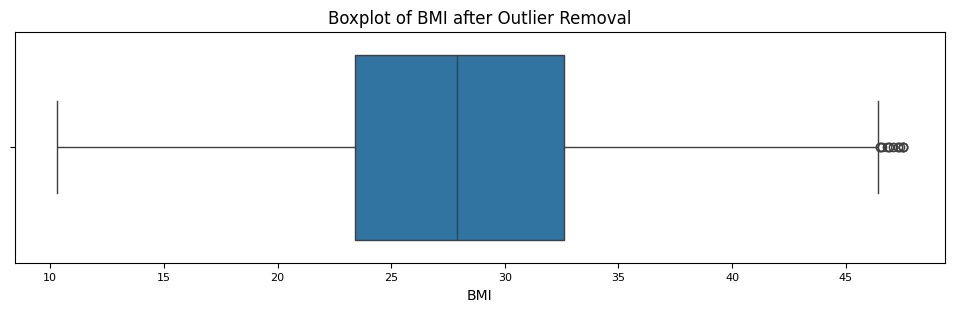

In [273]:
import seaborn as sns
sns.boxplot(x = 'bmi', data = new_df_filtered)
plt.title('Boxplot of BMI after Outlier Removal')
plt.xlabel('BMI')

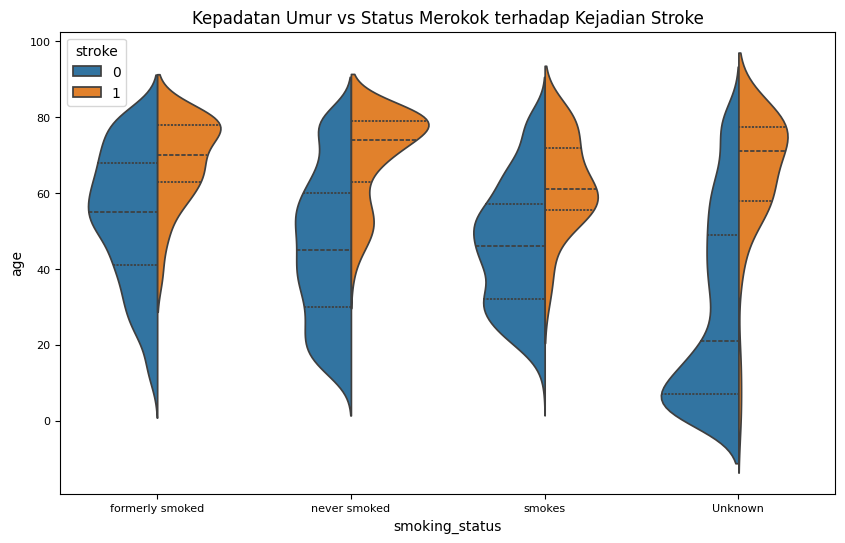

In [299]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoking_status', y='age', hue='stroke', data=df, split=True, inner="quart")
plt.title("Kepadatan Umur vs Status Merokok terhadap Kejadian Stroke")
plt.show()

<Figure size 1000x600 with 0 Axes>

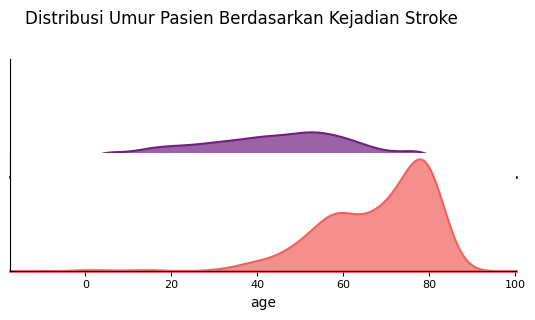

In [300]:
# Joy Plot menggunakan Seaborn FacetGrid
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(df, row="stroke", hue="stroke", aspect=4, height=1.5, palette='magma')
g.map(sns.kdeplot, "age", fill=True, alpha=0.7, lw=1.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.fig.subplots_adjust(hspace=-0.2)
g.set_titles("")
g.set(yticks=[], ylabel="")
plt.suptitle("Distribusi Umur Pasien Berdasarkan Kejadian Stroke", y=1.05)
plt.show()

In [303]:
import plotly.express as px

fig = px.scatter(new_df_filtered, x="age", y="avg_glucose_level", color="stroke",
                 size='bmi', hover_data=['gender'],
                 title="Interaktif: Hubungan Umur, Glukosa, dan BMI")
fig.show()

# Transformation

min max scaler

In [275]:
from sklearn.preprocessing import MinMaxScaler

X = new_df_filtered[['age', 'avg_glucose_level', 'bmi']].copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Simpan hasil transformasi dalam DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['age_scaled', 'avg_glucose_level_scaled', 'bmi_scaled'], index=new_df_filtered.index)

# Tambahkan hasil transformasi ke new_df_filtered
new_df_scaled = new_df_filtered.copy()
new_df_scaled[['age_scaled', 'avg_glucose_level_scaled', 'bmi_scaled']] = X_scaled_df

print("Min values:", scaler.data_min_)
print("Max values:", scaler.data_max_)
print(new_df_scaled.head())

Min values: [ 0.08 55.12 10.3 ]
Max values: [ 82.   271.74  47.5 ]
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status stroke  age_scaled  \
0          Urban             228.69  36.6  formerly smoked      1    0.816895   
2          Rural             105.92  32.5     never smoked      1    0.975586   
3          Urban             171.23  34.4           smokes      1    0.597168   
4          Rural             174.12  24.0     never smoked      1    0.963379   
5          Urban             186.21  29.0  formerly smoked      1    0.

In [276]:
new_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    4799 non-null   category
 1   age                       4799 non-null   float64 
 2   hypertension              4799 non-null   int64   
 3   heart_disease             4799 non-null   int64   
 4   ever_married              4799 non-null   object  
 5   work_type                 4799 non-null   object  
 6   Residence_type            4799 non-null   object  
 7   avg_glucose_level         4799 non-null   float64 
 8   bmi                       4799 non-null   float64 
 9   smoking_status            4799 non-null   object  
 10  stroke                    4799 non-null   category
 11  age_scaled                4799 non-null   float64 
 12  avg_glucose_level_scaled  4799 non-null   float64 
 13  bmi_scaled                4799 non-null   float64 
dt

Z score

In [278]:
from scipy.stats import zscore

# Calculate the zscores and drop zscores into new column
print(new_df_filtered['bmi'].mean(), new_df_filtered['bmi'].std())
zscore(new_df_filtered['bmi'])

28.31358616378412 6.841250488741974


array([ 1.21136879,  0.6120007 ,  0.88975664, ...,  0.33424475,
       -0.39669194, -0.30897954])

Decimal Scaling

In [282]:
new_df_filtered['age']/100

,age
0,0.67
2,0.80
3,0.49
4,0.79
5,0.81
...,...
5104,0.13
5106,0.81
5107,0.35
5108,0.51


# Sampling

Stratified Sampling

In [297]:
stratified_sample_df = new_df_filtered.groupby('gender', group_keys=False, observed=False).apply(lambda x: x.sample(frac=0.6), include_groups=False)

# Feature Selection

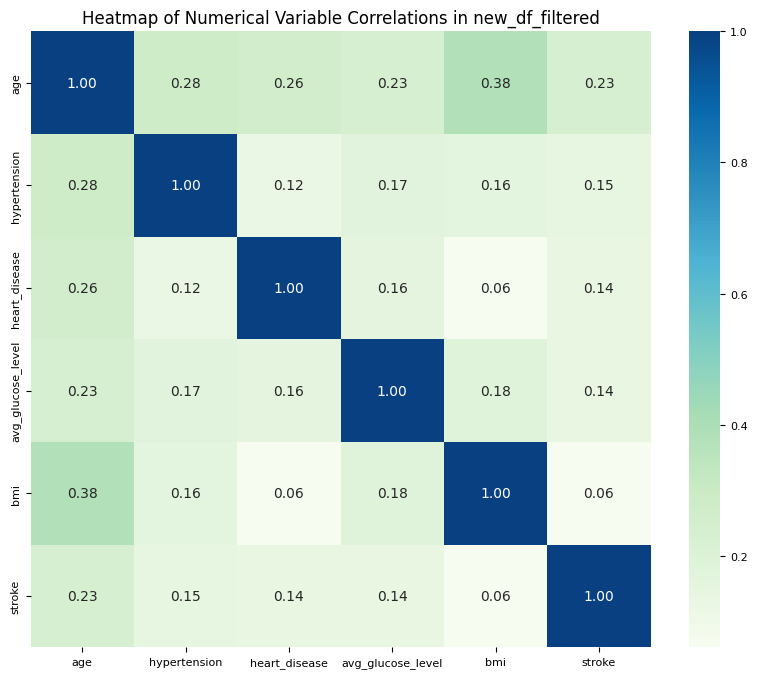

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns from new_df_filtered
correlation_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

plt.figure(figsize=(10, 8))
sns.heatmap(new_df_filtered[correlation_cols].corr(), annot=True, cmap='GnBu', fmt=".2f")
plt.title('Heatmap of Numerical Variable Correlations in new_df_filtered')
plt.show()

In [289]:
from scipy.stats import pointbiserialr
a = new_df_filtered['stroke'].astype('int64')
b = new_df_filtered['bmi']
pointbiserialr(a, b)

SignificanceResult(statistic=np.float64(0.06028987700242362), pvalue=np.float64(2.9242836625721066e-05))

In [291]:
from scipy.stats import chi2_contingency
chisqt = pd.crosstab(new_df_filtered['stroke'], new_df_filtered['gender'], margins=True)
chisqt

gender,Female,Male,Other,All
stroke,,,,
0,2694,1897,1,4592
1,118,89,0,207
All,2812,1986,1,4799
